<a href="https://colab.research.google.com/github/imdineshkumar24/Deep_learning_lab_exp/blob/main/dl_ex_lab_2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
-import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from collections import Counter

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from sklearn.metrics import classification_report

In [ ]:
(x_train,y_train),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
x_train.shape[0]

60000

In [ ]:
x_test.shape[0]

10000

In [ ]:
x_train_normal = x_train[np.where(y_train == 0)]

In [ ]:
input_layer = keras.layers.Input(shape=(28, 28))

In [ ]:
encoder = keras.Sequential([
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu")
])(input_layer)

In [ ]:
decoder = keras.Sequential([
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(28, activation="sigmoid")
])(encoder)

In [ ]:
autoencoder = keras.Model(inputs=input_layer, outputs=decoder)

In [ ]:
autoencoder.compile(optimizer="adam", loss='mean_squared_error')

In [ ]:
history = autoencoder.fit(x_train_normal, x_train_normal,
                          epochs=20,
                          batch_size=64,
                          validation_data=(x_test, x_test),
                          shuffle=True)

Epoch 1/20
94/94 [==============================] - 5s 31ms/step - loss: 14733.1230 - val_loss: 13282.7500
Epoch 2/20
94/94 [==============================] - 3s 29ms/step - loss: 14728.0586 - val_loss: 13282.7666
Epoch 3/20
94/94 [==============================] - 3s 27ms/step - loss: 14727.9785 - val_loss: 13282.7012
Epoch 4/20
94/94 [==============================] - 3s 31ms/step - loss: 14727.9443 - val_loss: 13282.4756
Epoch 5/20
94/94 [==============================] - 3s 27ms/step - loss: 14727.9277 - val_loss: 13282.4717
Epoch 6/20
94/94 [==============================] - 3s 27ms/step - loss: 14727.9229 - val_loss: 13282.4570
Epoch 7/20
94/94 [==============================] - 2s 23ms/step - loss: 14727.9189 - val_loss: 13282.4414
Epoch 8/20
94/94 [==============================] - 3s 27ms/step - loss: 14727.9170 - val_loss: 13282.4316
Epoch 9/20
94/94 [==============================] - 3s 31ms/step - loss: 14727.9111 - val_loss: 13282.4199
Epoch 10/20
94/94 [==================

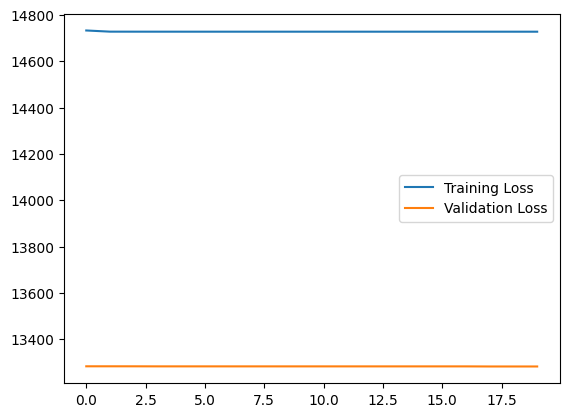

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [ ]:
x_test = x_test.astype('float32')
prediction = autoencoder.predict(x_test)
prediction_loss = tf.keras.losses.mean_absolute_error(prediction, x_test)

313/313 [==============================] - 2s 6ms/step


In [ ]:
loss_threshold = np.percentile(prediction_loss, 98)
print(f"The prediction loss threshold for 2% of outliers is {loss_threshold:.2f}")

The prediction loss threshold for 2% of outliers is 183.21


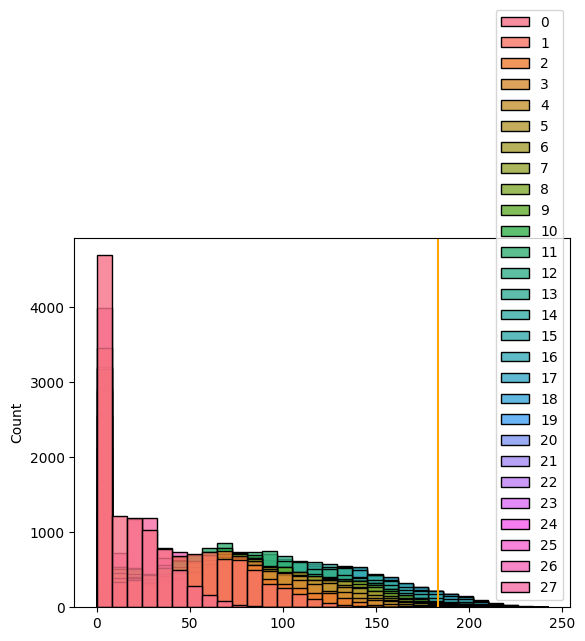

In [ ]:
sns.histplot(prediction_loss, bins=30, alpha=0.8)
plt.axvline(x=loss_threshold, color="orange")